In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


In [2]:
# importing the libraries
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)


Reading the data

In [3]:
df = pd.read_csv("/kaggle/input/movies/movies.csv")
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [4]:
# displaying the top 5 rows
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


## Data cleaning

In [5]:
# Finding the missing values
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

Clearly, There is no missing values in the data

In [6]:
# Checking the data types of each columns in the data
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

If we check the values in column "Budget" and "Gross" we can see that it is in "float" datatypes but there is no digits after the decimals, so we change the data type from "float" to "int"

In [7]:
df['budget']=df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


The year has incorrect values while we compare it with the released date column

In [9]:
# creating correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [10]:
# changing the data type of 'yearcorrected' to int
df['yearcorrect'] = df['yearcorrect'].astype('int64')
df.dtypes

budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime          int64
score          float64
star            object
votes            int64
writer          object
year             int64
yearcorrect      int64
dtype: object

Viewing the top 5 movies with highest gross by Sorting the values by "Gross" column

In [11]:
df = df.sort_values(by=['gross'],ascending=False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


Checking for duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


## EDA and finding correaltions

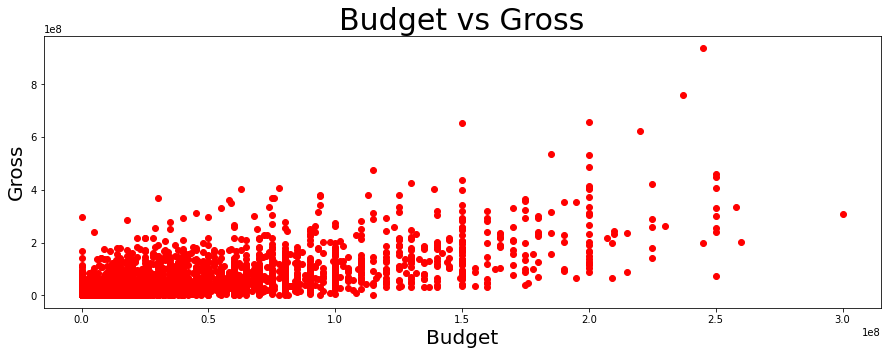

In [14]:
# budeget vs gross
figure = plt.figure(figsize=(15,5))
plt.scatter(x=df['budget'],y=df['gross'],color='red')
plt.title("Budget vs Gross",size=30)
plt.xlabel("Budget",size=20)
plt.ylabel("Gross",size=20)
plt.show()

In [15]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

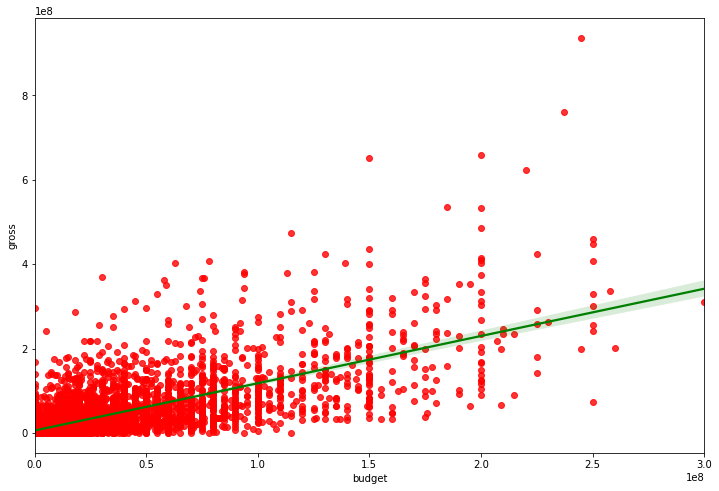

In [16]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})

Budget and Gross are positively correlated

In [17]:
# correlations
df.corr()

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
yearcorrect,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


There is high correlation with budget and gross

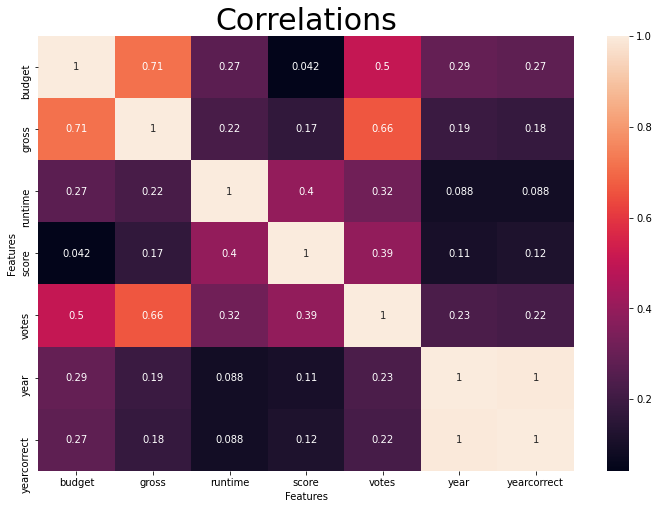

In [18]:
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlations",size=30)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [19]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [20]:
## Changing the categorical features into categories and replacing with an integer values for distinct category
df_num = df.copy()
for col in df_num.columns:
    if(df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

df_num.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,1997
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,2012


Now we have changed the categorical values to an individual categories with integer values

In [21]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


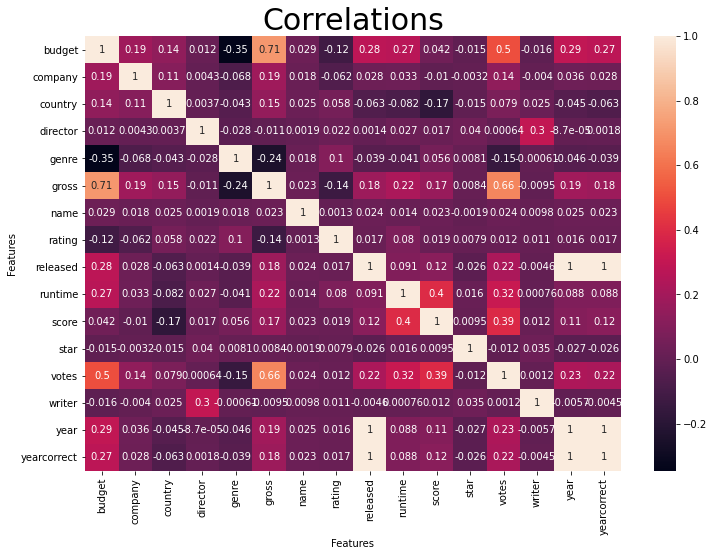

In [22]:
corr_mat = df_num.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlations",size=30)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [23]:
cor_matrix = df_num.corr()
corr_pairs=cor_matrix.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
                              ...   
yearcorrect  star          -0.026052
             votes          0.220797
             writer        -0.004546
             year           0.996229
             yearcorrect    1.000000
Length: 256, dtype: float64

In [ ]:
pd.set_option("display.max_rows",None)

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

## Columns with high correlatinos

In [25]:
sorted_pairs[sorted_pairs>0.5]

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y

Votes and Budgets has the higest correlations for the gross and company has low correlations

## Exploratory Data Analysis

In [26]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


### Company

In [27]:
com = df.groupby(['name','company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
com.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,budget,gross
name,company,,
Star Wars: The Force Awakens,Lucasfilm,245000000,936662225
Avatar,Twentieth Century Fox Film Corporation,237000000,760507625
Titanic,Twentieth Century Fox Film Corporation,200000000,658672302
Jurassic World,Universal Pictures,150000000,652270625
The Avengers,Marvel Studios,220000000,623357910
The Dark Knight,Warner Bros.,185000000,534858444
Rogue One,Lucasfilm,200000000,532177324
Finding Dory,Pixar Animation Studios,200000000,486295561
Star Wars: Episode I - The Phantom Menace,Lucasfilm,115000000,474544677


In [28]:
com=com.reset_index()
com.to_csv("Name and company with budget and gross.csv",index=False)
com

,name,company,budget,gross
0,Star Wars: The Force Awakens,Lucasfilm,245000000,936662225
1,Avatar,Twentieth Century Fox Film Corporation,237000000,760507625
2,Titanic,Twentieth Century Fox Film Corporation,200000000,658672302
3,Jurassic World,Universal Pictures,150000000,652270625
4,The Avengers,Marvel Studios,220000000,623357910
...,...,...,...,...
6812,Into the White,Zentropa International Norway,0,547
6813,The Decoy Bride,Isle of Man Film,0,542
6814,I Spit on Your Grave 2,Cinetel Films,0,441
6815,Trojan War,Daybreak,15000000,309


In [29]:
top10com=com.head(10)
top10com

,name,company,budget,gross
0,Star Wars: The Force Awakens,Lucasfilm,245000000,936662225
1,Avatar,Twentieth Century Fox Film Corporation,237000000,760507625
2,Titanic,Twentieth Century Fox Film Corporation,200000000,658672302
3,Jurassic World,Universal Pictures,150000000,652270625
4,The Avengers,Marvel Studios,220000000,623357910
5,The Dark Knight,Warner Bros.,185000000,534858444
6,Rogue One,Lucasfilm,200000000,532177324
7,Finding Dory,Pixar Animation Studios,200000000,486295561
8,Star Wars: Episode I - The Phantom Menace,Lucasfilm,115000000,474544677
9,Avengers: Age of Ultron,Marvel Studios,250000000,459005868


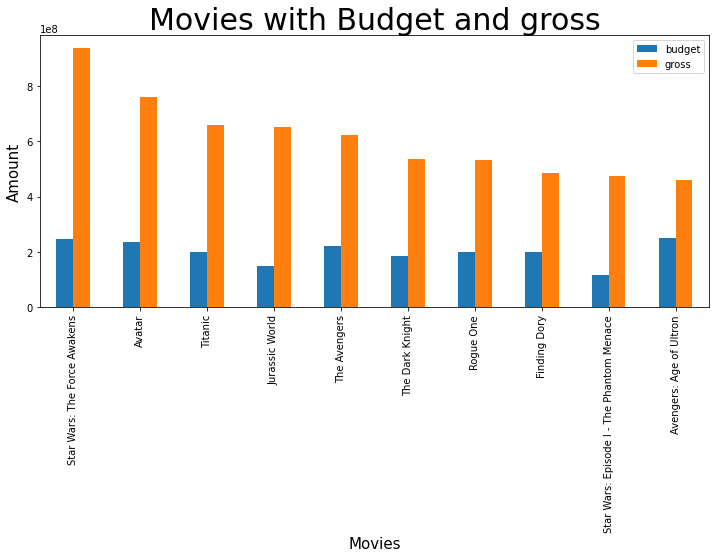

In [30]:
top10com.plot(x='name',y=['budget','gross'],kind='bar',figsize=(12,5))
plt.title("Movies with Budget and gross",size=30)
plt.xlabel("Movies",size=15)
plt.ylabel("Amount",size=15)
plt.show()

In [31]:
com = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
com.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,budget,gross
company,,
Warner Bros.,16593700000,21322318408
Universal Pictures,13832130001,19430051320
Paramount Pictures,11656600000,17115702495
Twentieth Century Fox Film Corporation,9859100000,14788570587
Walt Disney Pictures,7561200000,10455507123
Columbia Pictures,7251900000,8824216545
New Line Cinema,5329700000,8540112287
Columbia Pictures Corporation,6169807000,7720114061
Touchstone Pictures,3952200000,6688156475


In [32]:
top10c = com.reset_index()
top10c.head()

,company,budget,gross
0,Warner Bros.,16593700000,21322318408
1,Universal Pictures,13832130001,19430051320
2,Paramount Pictures,11656600000,17115702495
3,Twentieth Century Fox Film Corporation,9859100000,14788570587
4,Walt Disney Pictures,7561200000,10455507123


In [33]:
top10c.to_csv('Companies with highest budget and gross.csv',index=False)

In [34]:
top10c = top10c.head()
top10c

,company,budget,gross
0,Warner Bros.,16593700000,21322318408
1,Universal Pictures,13832130001,19430051320
2,Paramount Pictures,11656600000,17115702495
3,Twentieth Century Fox Film Corporation,9859100000,14788570587
4,Walt Disney Pictures,7561200000,10455507123


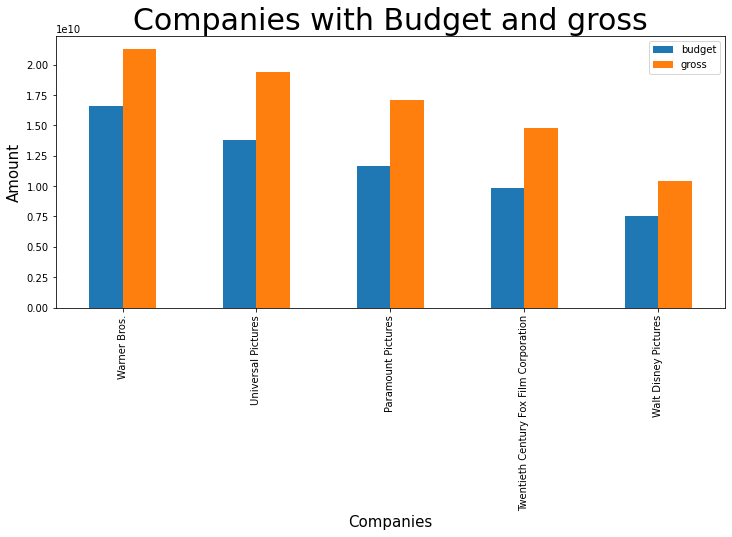

In [35]:
top10c.plot(x='company',y=['budget','gross'],kind='bar',figsize=(12,5))
plt.title("Companies with Budget and gross",size=30)
plt.xlabel("Companies",size=15)
plt.ylabel("Amount",size=15)
plt.show()

In [36]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


### Coutries with respective of Budgets and gross

In [55]:
country_counts=df['country'].value_counts()
country_counts=country_counts.to_frame()
country_counts=country_counts.reset_index()

In [57]:
country_counts.rename(columns={'index':'country','country':'count'},inplace=True)

In [58]:
country_counts.to_csv("Count of country.csv",index=False)

In [38]:
top10country=top10country.to_frame()
top10country=top10country.reset_index()


In [39]:
top10country

,index,country
0,USA,4872
1,UK,698
2,France,283
3,Canada,150
4,Germany,134
5,Australia,82
6,Japan,68
7,Spain,56
8,Italy,51
9,Ireland,44


In [40]:
top10country.rename(columns={'index':'country','country':'No. of flims'},inplace=True)
top10country

,country,No. of flims
0,USA,4872
1,UK,698
2,France,283
3,Canada,150
4,Germany,134
5,Australia,82
6,Japan,68
7,Spain,56
8,Italy,51
9,Ireland,44


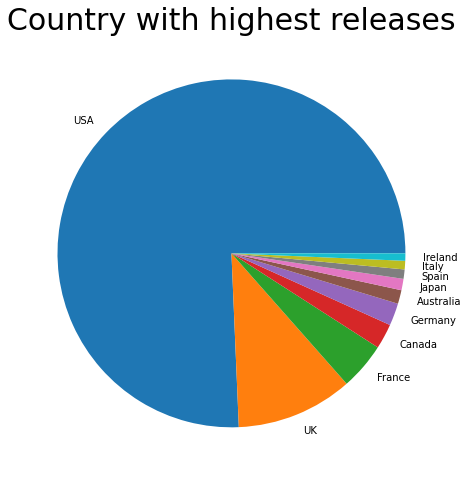

In [41]:
fig = plt.figure(figsize=(12,8))
plt.pie(top10country['No. of flims'],labels=top10country['country'])
plt.title("Country with highest releases",size=30)
plt.show()

In [59]:
bgcountry=df.groupby(['country'])['budget','gross'].sum().sort_values(by=['gross'],ascending=False)
bgcountry

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,budget,gross
country,,
USA,139948420035,197934880427
UK,12356215000,14209816197
Germany,3666250000,3199462543
France,3113300000,3037066879
Canada,1893225000,2296115123
Australia,1128290000,1623710687
Japan,647200000,1165489704
China,1110400000,1005234480
New Zealand,706600000,933289753


In [61]:
bgcountry.reset_index(inplace=True)

In [64]:
bgcountry.to_csv("country and their budget and gross.csv",index=False)

In [43]:
top10bgcountry = bgcountry.head(10)
top10bgcountry.reset_index(inplace=True)

In [44]:
top10bgcountry.to_csv("Country wise gross and budget.csv",index=False)
top10bgcountry

,country,budget,gross
0,USA,139948420035,197934880427
1,UK,12356215000,14209816197
2,Germany,3666250000,3199462543
3,France,3113300000,3037066879
4,Canada,1893225000,2296115123
5,Australia,1128290000,1623710687
6,Japan,647200000,1165489704
7,China,1110400000,1005234480
8,New Zealand,706600000,933289753
9,Hong Kong,596428966,595212447


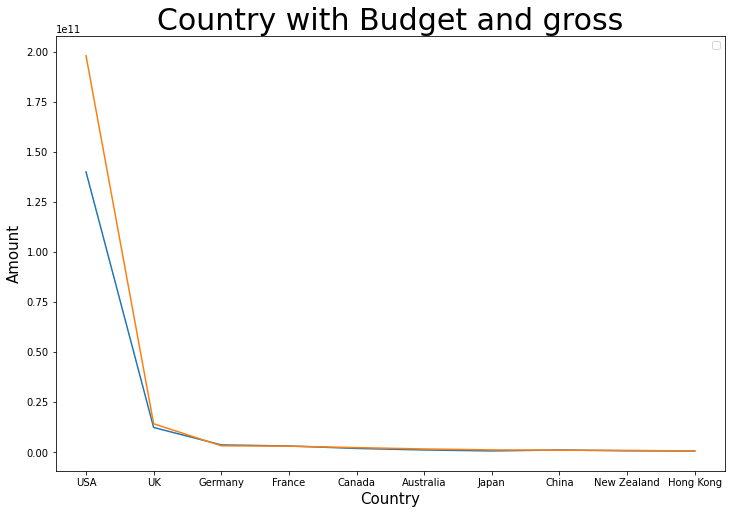

In [45]:
plt.plot(top10bgcountry['country'],top10bgcountry['budget'],top10bgcountry['country'],top10bgcountry['gross'])
plt.title("Country with Budget and gross",size=30)
plt.xlabel("Country",size=15)
plt.ylabel("Amount",size=15)
plt.legend()
plt.show()

In [46]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


### Genres vs gross

In [65]:
genre_gross=df.groupby(['genre'])['gross'].sum()
genre_gross=genre_gross.to_frame()
genre_gross.reset_index(inplace=True)

In [66]:
genre_gross.to_csv("Genre vs gross.csv",index=False)
genre_gross

,genre,gross
0,Action,74792634664
1,Adventure,20895092830
2,Animation,25342203262
3,Biography,8617526666
4,Comedy,53543423603
5,Crime,10217836159
6,Drama,25204622256
7,Family,118110208
8,Fantasy,644653115
9,Horror,7117846856


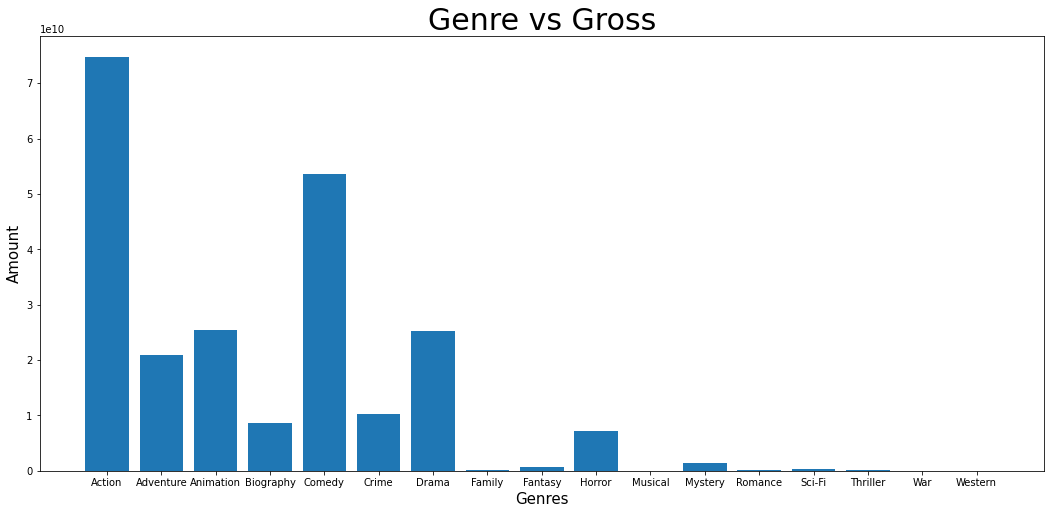

In [68]:
fig = plt.figure(figsize=(18,8))
plt.bar(genre_gross['genre'],genre_gross['gross'])
plt.title("Genre vs Gross",size=30)
plt.xlabel("Genres",size=15)
plt.ylabel("Amount",size=15)
plt.show()

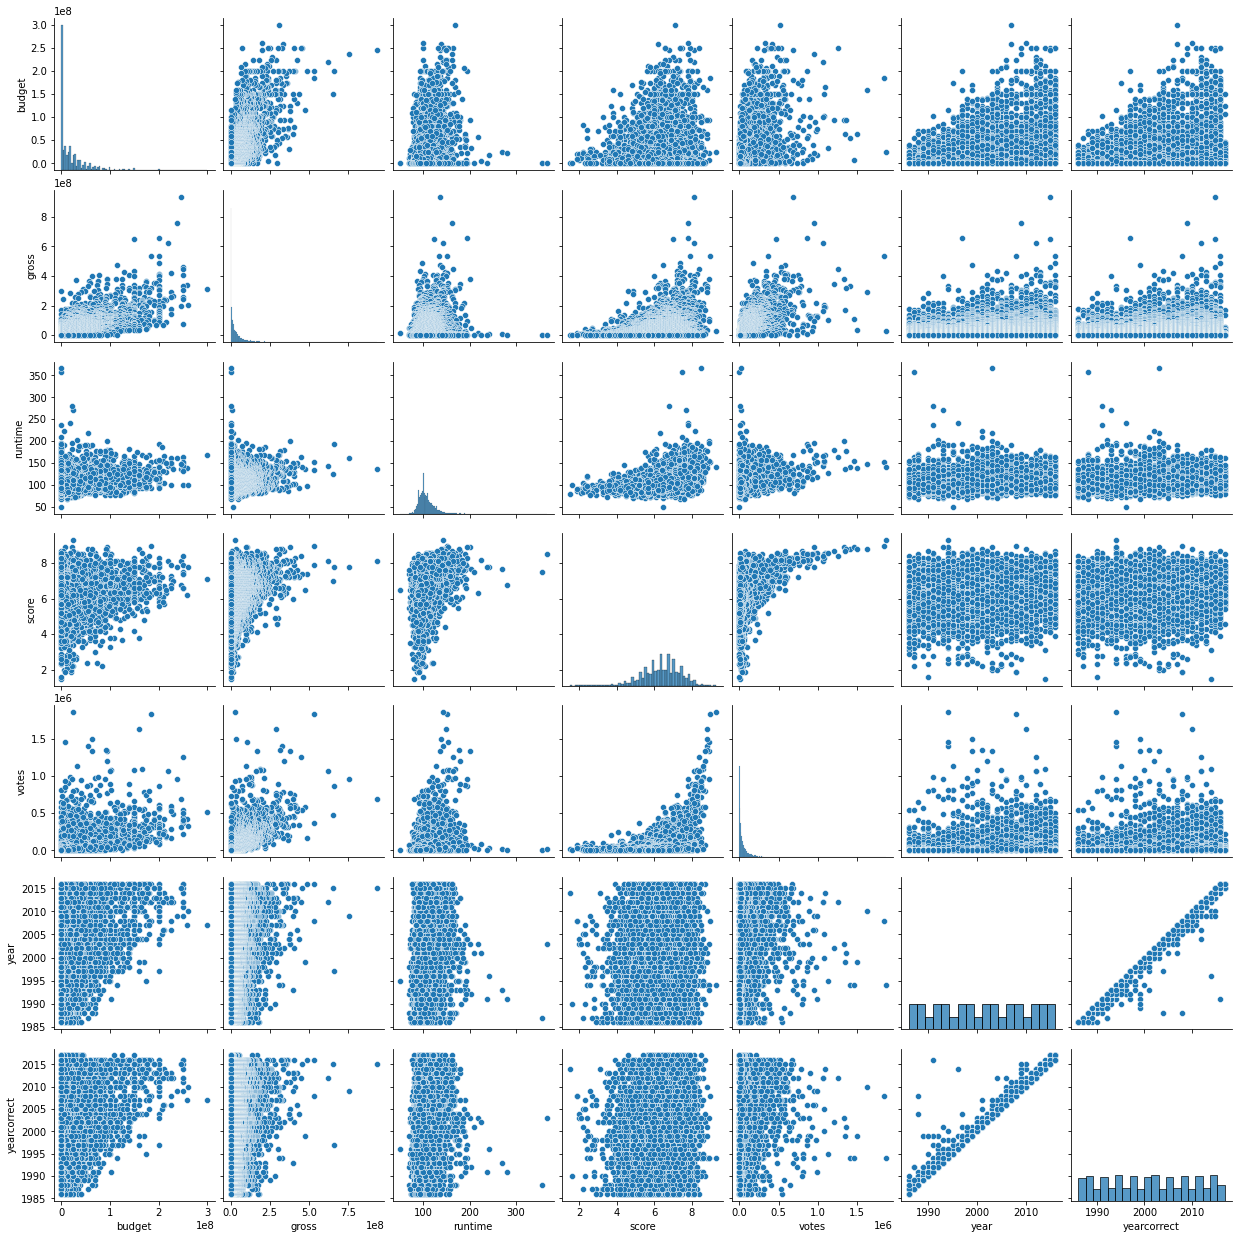

In [69]:
sns.pairplot(df,diag_kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


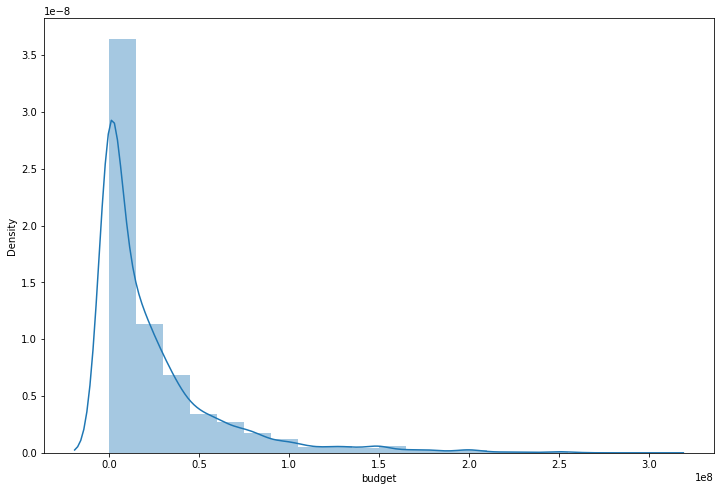

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


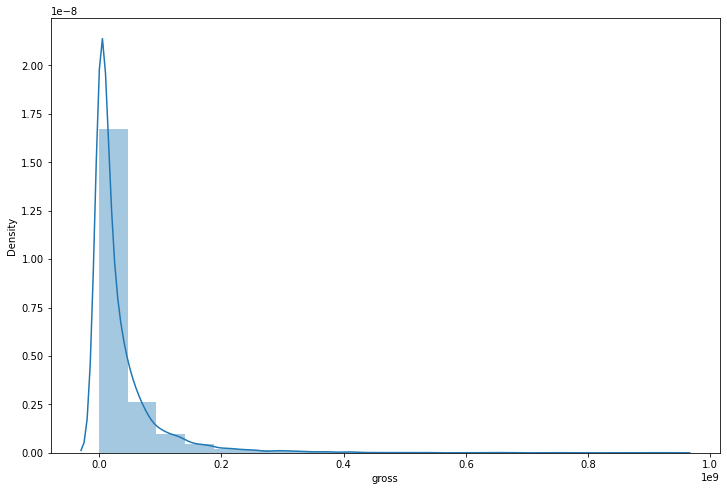

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


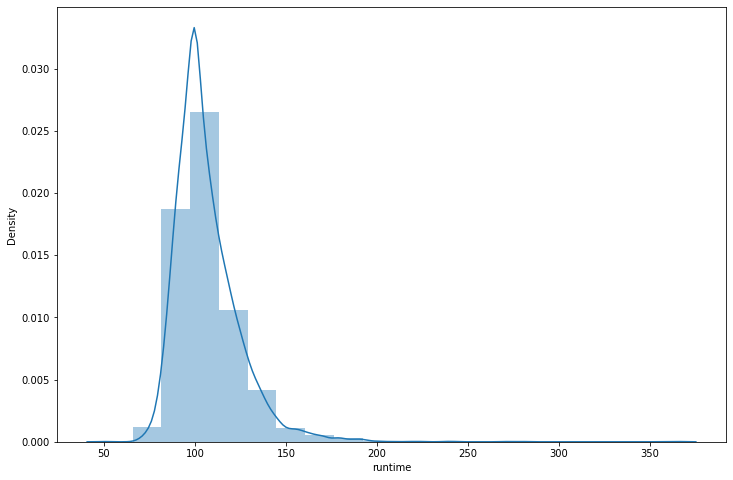

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


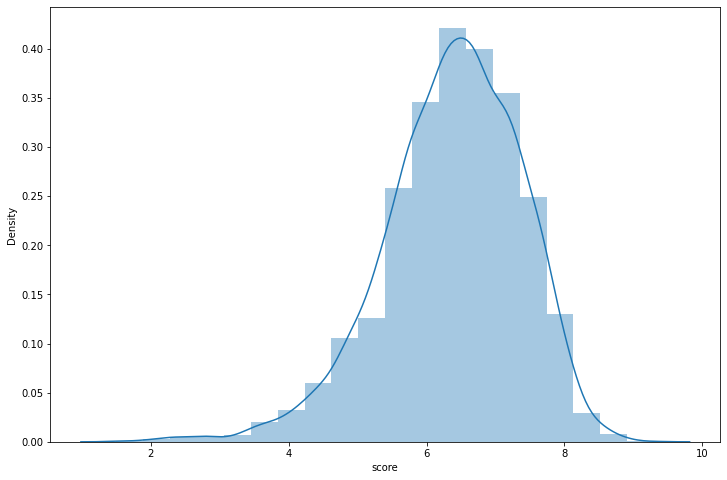

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


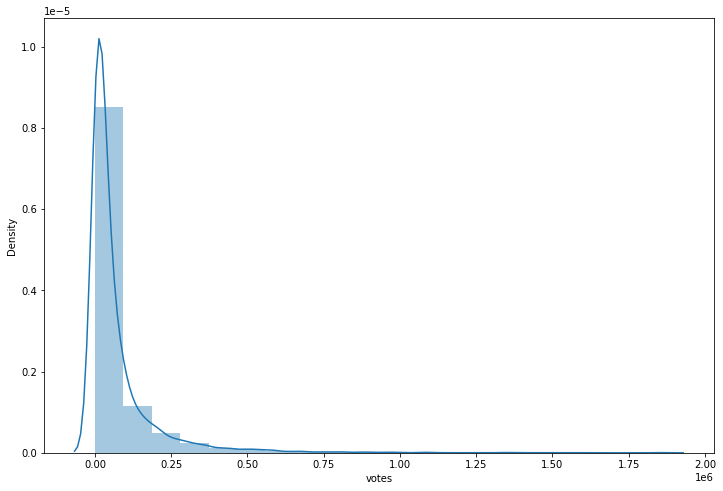

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


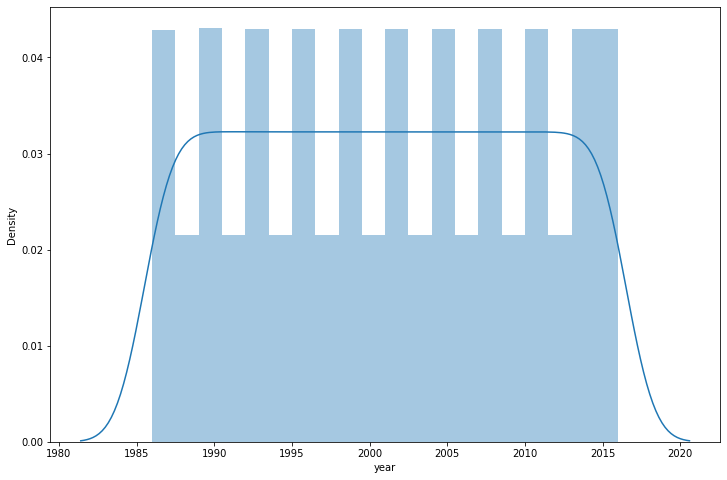

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


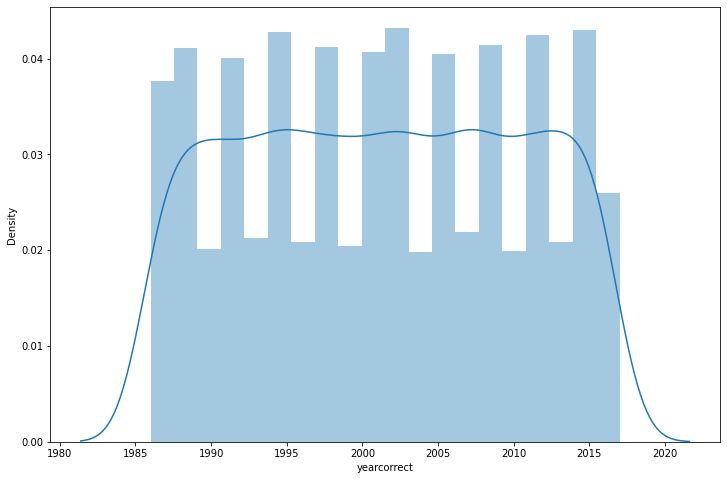

In [92]:
for col in df.columns:
    if df[col].dtype !="object":
        sns.distplot(df[col],bins=20)
        plt.show()

In [94]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


### Counts dataframe

In [206]:
df[df['votes']==df['votes'].max()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
1760,25000000,Castle Rock Entertainment,USA,Frank Darabont,Crime,28341469,The Shawshank Redemption,R,1994-10-14,142,9.3,Tim Robbins,1861666,Stephen King,1994,1994


In [224]:
df[df['votes']==df['votes'].max()].name


1760    The Shawshank Redemption
Name: name, dtype: object

In [155]:
lst = []
len(df['director'].unique())
df['budget'].sum()

167643300229

In [225]:
lst=({'No. of directors':len(df['director'].unique()),
      'No. of movies':len(df['name'].unique()),
      'Total budget':df['budget'].sum(),
      'Total gross':df['gross'].sum(),
      'Movie with higest votes':'The Shawshank Redemption'})
    


In [226]:
lst

{'No. of directors': 2759,
 'No. of movies': 6731,
 'Total budget': 167643300229,
 'Total gross': 228455191158,
 'Movie with higest votes': 'The Shawshank Redemption'}

In [227]:
header=pd.DataFrame(lst,index={'0'})

In [232]:
header.reset_index()

,index,No. of directors,No. of movies,Total budget,Total gross,Movie with higest votes
0,0,2759,6731,167643300229,228455191158,The Shawshank Redemption


In [234]:
header.to_csv("Header.csv",index=False)